#### Цель задания:
Познакомиться с основами обучения с подкреплением (Reinforcement Learning, RL), понять основные концепции и применить их на практике, используя простой алгоритм Q-Learning для решения задачи.

#### Задание:

1. **Теоретическая часть:**
    - Прочитайте материалы о концепциях обучения с подкреплением: агент, среда, действия, награды, состояния, политика, функция ценности и функция награды.
    - Напишите краткое эссе (1-2 страницы) о том, как обучение с подкреплением отличается от других видов обучения (например, обучение с учителем и обучение без учителя).

2. **Практическая часть:**
    - Реализуйте алгоритм Q-Learning для решения задачи "Замкнутый лабиринт" (Gridworld).
    - Визуализируйте политику и функцию ценности, найденные вашим агентом.

3. **Дополнительные задания (для продвинутых студентов):**
    - Реализуйте алгоритм SARSA и сравните его результаты с Q-Learning на той же задаче.
    - Изучите и реализуйте epsilon-greedy стратегию для выбора действий.

**Все результаты выполнения работы поместите в один блокнот Colab, сохраните, расшарьте для просмотра и направьте преподавателю на проверку.**


#### Подробное описание заданий 2 и 3:

2. **Практическая часть:**

    **Часть 1: Реализация Q-Learning**
    - Создайте среду "Gridworld" размером 5x5. Ваша задача — найти путь от стартовой клетки (в левом верхнем углу) до целевой клетки (в правом нижнем углу), избегая препятствий.
    - Используйте следующую формулу обновления Q-значений:

$
Q(s, a) \leftarrow Q(s, a) + \alpha [r + \gamma \max_{a'} Q(s', a') - Q(s, a)]
$

      где:
- $ s $ — текущее состояние,
- $ a $ — текущее действие,
- $ r $ — награда,
- $ s' $ — новое состояние,
- $ \alpha $ — скорость обучения (learning rate),
- 4 \gamma $ — коэффициент дисконтирования (discount factor).

    **Пример кода для начала:**

    ```python
    import numpy as np

    # Параметры
    alpha = 0.1
    gamma = 0.9
    epsilon = 0.1
    episodes = 1000
    grid_size = 5

    # Инициализация Q-таблицы
    Q = np.zeros((grid_size, grid_size, 4))

    # Функции для выбора действий и обновления Q-таблицы
    def choose_action(state):
        if np.random.rand() < epsilon:
            return np.random.randint(4)
        else:
            return np.argmax(Q[state])

    def update_q(state, action, reward, next_state):
        best_next_action = np.argmax(Q[next_state])
        td_target = reward + gamma * Q[next_state][best_next_action]
        td_error = td_target - Q[state][action]
        Q[state][action] += alpha * td_error

    # Обучение агента
    for episode in range(episodes):
        state = (0, 0)
        done = False
        while not done:
            action = choose_action(state)
            next_state, reward, done = step(state, action)
            update_q(state, action, reward, next_state)
            state = next_state

    # Визуализация политики
    policy = np.argmax(Q, axis=2)
    print("Оптимальная политика:")
    print(policy)
    ```

    **Часть 2: Визуализация политики и функции ценности**
    - Визуализируйте оптимальную политику и функцию ценности после обучения.
    - Объясните результаты и проанализируйте, как агент принимает решения в разных состояниях.

3. **Дополнительные задания:**
    - Реализуйте алгоритм SARSA и сравните его с Q-Learning.
    - Внедрите epsilon-greedy стратегию для выбора действий и проанализируйте ее влияние на обучение.

#### Критерии оценки:

- Понимание теоретических концепций обучения с подкреплением.
- Корректность реализации алгоритма Q-Learning.
- Качество визуализации и анализ результатов.
- Выполнение дополнительных заданий (если применимо).


#Примеры кода


**Политика:** Оптимальная политика показывает действия, которые агент предпочитает в каждом состоянии, чтобы максимизировать награду.

------------
**Функция ценности:** Функция ценности показывает ожидаемую накопленную награду для каждого состояния.

Реализация Q-Learning

In [4]:
import numpy as np

# Параметры
alpha = 0.1
gamma = 0.9
epsilon = 0.1
episodes = 1000
grid_size = 5

# Действия: вверх, вниз, влево, вправо
actions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

# Инициализация Q-таблицы
Q = np.zeros((grid_size, grid_size, len(actions)))

# Функции для выбора действий и обновления Q-таблицы
def choose_action(state):
    if np.random.rand() < epsilon:
        return np.random.randint(len(actions))
    else:
        return np.argmax(Q[state])

def step(state, action):
    next_state = (state[0] + actions[action][0], state[1] + actions[action][1])
    if next_state[0] < 0 or next_state[0] >= grid_size or next_state[1] < 0 or next_state[1] >= grid_size:
        next_state = state  # оставаться на месте, если выходит за пределы
    reward = 1 if next_state == (grid_size-1, grid_size-1) else -0.1
    done = next_state == (grid_size-1, grid_size-1)
    return next_state, reward, done

def update_q(state, action, reward, next_state):
    best_next_action = np.argmax(Q[next_state])
    td_target = reward + gamma * Q[next_state][best_next_action]
    td_error = td_target - Q[state][action]
    Q[state][action] += alpha * td_error

# Обучение агента
for episode in range(episodes):
    state = (0, 0)
    done = False
    while not done:
        action = choose_action(state)
        next_state, reward, done = step(state, action)
        update_q(state, action, reward, next_state)
        state = next_state

# Визуализация политики
policy = np.argmax(Q, axis=2)
print("Оптимальная политика:")
print(policy)


Оптимальная политика:
[[3 3 1 1 1]
 [3 3 3 1 1]
 [3 3 3 3 1]
 [2 3 1 1 1]
 [3 3 3 3 0]]


Визуализация политики и функции ценности

In [3]:
import matplotlib.pyplot as plt

# Функция ценности
value_function = np.max(Q, axis=2)

plt.figure(figsize=(10, 6))

# Политика
plt.subplot(1, 2, 1)
plt.title('Политика')
plt.imshow(policy, cmap='viridis', origin='upper')
for i in range(grid_size):
    for j in range(grid_size):
        plt.text(j, i, policy[i, j], ha='center', va='center', color='white')

# Функция ценности
plt.subplot(1, 2, 2)
plt.title('Функция ценности')
plt.imshow(value_function, cmap='viridis', origin='upper')
for i in range(grid_size):
    for j in range(grid_size):
        plt.text(j, i, round(value_function[i, j], 2), ha='center', va='center', color='white')

plt.show()


NameError: name 'np' is not defined

Реализация SARSA

In [2]:
def update_sarsa_q(state, action, reward, next_state, next_action):
    td_target = reward + gamma * Q[next_state][next_action]
    td_error = td_target - Q[state][action]
    Q[state][action] += alpha * td_error

# Обучение агента с использованием SARSA
Q = np.zeros((grid_size, grid_size, len(actions)))
for episode in range(episodes):
    state = (0, 0)
    action = choose_action(state)
    done = False
    while not done:
        next_state, reward, done = step(state, action)
        next_action = choose_action(next_state)
        update_sarsa_q(state, action, reward, next_state, next_action)
        state, action = next_state, next_action

policy_sarsa = np.argmax(Q, axis=2)
print("Оптимальная политика (SARSA):")
print(policy_sarsa)


NameError: name 'np' is not defined

Реализация epsilon-greedy стратегии

In [1]:
def update_sarsa_q(state, action, reward, next_state, next_action):
    td_target = reward + gamma * Q[next_state][next_action]
    td_error = td_target - Q[state][action]
    Q[state][action] += alpha * td_error

# Обучение агента с использованием SARSA
Q = np.zeros((grid_size, grid_size, len(actions)))
for episode in range(episodes):
    state = (0, 0)
    action = choose_action(state)
    done = False
    while not done:
        next_state, reward, done = step(state, action)
        next_action = choose_action(next_state)
        update_sarsa_q(state, action, reward, next_state, next_action)
        state, action = next_state, next_action

policy_sarsa = np.argmax(Q, axis=2)
print("Оптимальная политика (SARSA):")
print(policy_sarsa)


NameError: name 'np' is not defined

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Оптимальная политика:
[[3 1 1 1 1]
 [3 1 1 1 1]
 [3 3 3 3 1]
 [3 3 1 1 1]
 [3 3 3 3 0]]


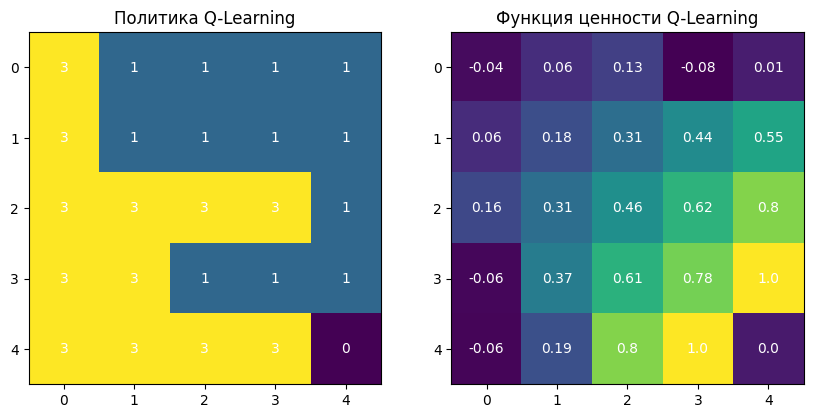

In [8]:
  import numpy as np

# Параметры
alpha = 0.1
gamma = 0.9
epsilon = 0.1
episodes = 1000
grid_size = 5

# Действия: вверх, вниз, влево, вправо
actions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

# Инициализация Q-таблицы
Q = np.zeros((grid_size, grid_size, len(actions)))

# Функции для выбора действий и обновления Q-таблицы
def choose_action(state):
    if np.random.rand() < epsilon:
        return np.random.randint(len(actions))
    else:
        return np.argmax(Q[state])

def step(state, action):
    next_state = (state[0] + actions[action][0], state[1] + actions[action][1])
    if next_state[0] < 0 or next_state[0] >= grid_size or next_state[1] < 0 or next_state[1] >= grid_size:
        next_state = state  # оставаться на месте, если выходит за пределы
    reward = 1 if next_state == (grid_size-1, grid_size-1) else -0.1
    done = next_state == (grid_size-1, grid_size-1)
    return next_state, reward, done

def update_q(state, action, reward, next_state):
    best_next_action = np.argmax(Q[next_state])
    td_target = reward + gamma * Q[next_state][best_next_action]
    td_error = td_target - Q[state][action]
    Q[state][action] += alpha * td_error

# Обучение агента
for episode in range(episodes):
    state = (0, 0)
    done = False
    while not done:
        action = choose_action(state)
        next_state, reward, done = step(state, action)
        update_q(state, action, reward, next_state)
        state = next_state

# Визуализация политики
policy = np.argmax(Q, axis=2)
print("Оптимальная политика:")
print(policy)

value_function = np.max(Q, axis=2)

plt.figure(figsize=(10, 6))

# Политика
plt.subplot(1, 2, 1)
plt.title('Политика Q-Learning')
plt.imshow(policy, cmap='viridis', origin='upper')
for i in range(grid_size):
    for j in range(grid_size):
        plt.text(j, i, policy[i, j], ha='center', va='center', color='white')

# Функция ценности
plt.subplot(1, 2, 2)
plt.title('Функция ценности Q-Learning')
plt.imshow(value_function, cmap='viridis', origin='upper')
for i in range(grid_size):
    for j in range(grid_size):
        plt.text(j, i, round(value_function[i, j], 2), ha='center', va='center', color='white')

plt.show()

Оптимальная политика (SARSA):
[[1 1 1 1 1]
 [1 1 1 1 1]
 [3 1 1 1 1]
 [3 3 3 3 1]
 [0 0 3 3 0]]
Оптимальная политика:
[[1 1 1 1 1]
 [1 1 1 1 1]
 [3 1 1 1 1]
 [3 3 3 3 1]
 [0 0 3 3 0]]


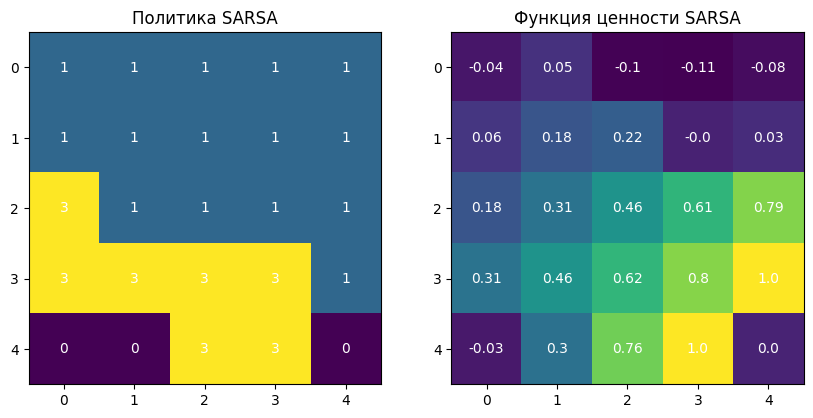

In [10]:
  import numpy as np

# Параметры
alpha = 0.1
gamma = 0.9
epsilon = 0.1
episodes = 1000
grid_size = 5

# Действия: вверх, вниз, влево, вправо
actions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

# Инициализация Q-таблицы
Q = np.zeros((grid_size, grid_size, len(actions)))

# Функции для выбора действий и обновления Q-таблицы
def choose_action(state):
    if np.random.rand() < epsilon:
        return np.random.randint(len(actions))
    else:
        return np.argmax(Q[state])

def update_sarsa_q(state, action, reward, next_state, next_action):
    td_target = reward + gamma * Q[next_state][next_action]
    td_error = td_target - Q[state][action]
    Q[state][action] += alpha * td_error

# Обучение агента с использованием SARSA
Q = np.zeros((grid_size, grid_size, len(actions)))
for episode in range(episodes):
    state = (0, 0)
    action = choose_action(state)
    done = False
    while not done:
        next_state, reward, done = step(state, action)
        next_action = choose_action(next_state)
        update_sarsa_q(state, action, reward, next_state, next_action)
        state, action = next_state, next_action

policy_sarsa = np.argmax(Q, axis=2)
print("Оптимальная политика (SARSA):")
print(policy_sarsa)

# Обучение агента
for episode in range(episodes):
    state = (0, 0)
    done = False
    while not done:
        action = choose_action(state)
        next_state, reward, done = step(state, action)
        update_q(state, action, reward, next_state)
        state = next_state

# Визуализация политики
policy = np.argmax(Q, axis=2)
print("Оптимальная политика:")
print(policy)

value_function = np.max(Q, axis=2)

plt.figure(figsize=(10, 6))

# Политика
plt.subplot(1, 2, 1)
plt.title('Политика SARSA')
plt.imshow(policy, cmap='viridis', origin='upper')
for i in range(grid_size):
    for j in range(grid_size):
        plt.text(j, i, policy[i, j], ha='center', va='center', color='white')

# Функция ценности
plt.subplot(1, 2, 2)
plt.title('Функция ценности SARSA')
plt.imshow(value_function, cmap='viridis', origin='upper')
for i in range(grid_size):
    for j in range(grid_size):
        plt.text(j, i, round(value_function[i, j], 2), ha='center', va='center', color='white')

plt.show()

Основой алгоритмов машинного обучения с учителем состоит в том, чтоб найти функцию отображения множества входных данных на заданное множество целевых данных с определенной точностью и возможностью построить функцию потерь которая характеризует качество подобранной функции отображения данных и математически ее оценить . Обучение без учителя не имея размеченных данных представляет их в другом виде, находя новые закономерности и скрытые связи. Отличие же обучения с подкреплением от выше перечисленных заключается в том, что мы не имея исходных данных строим модель по другому принципу, разделяя функции алгоритма на блоки которые звимодействуют с внешней средой и/или друг с другом позволяя улучшать алгорит выстраивая эти связи. Появляются такие понятия как агент(принимающий решения), среда, действие агента, состояние в котором находится агент, обратная связь от среды(награды, наказания) , стратегия агента по выбору действий , оценка полезности действий агента или полезности состояний.
Задачи решаемые с помощью методов. Обучение с учителем работает в распознавании изображений, обучение без учителя сегментирует данные выявляет закономерности в объемах данных, в отличии от двух выше перечисленных задача машинного обучения с подкреплением состоит в том, чтоб на зарнее не известном , мало известном объеме постоянно меняющихся входных данных построить оптимальный алгоритм, чему и служит подкрепление действий машины.